# A Bootstrap Method for One Sample Hypothesis Testing

A one-sample test determines whether or not a sample statistic is statistically different from a population value. We will now use a bootstrap method with the same purpose.

A bootstrap hypothesis test starts with a test statistic `t(x)` (not necessarily an estimate of a parameter).

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 10)
import matplotlib.pyplot as plt
import seaborn as sns;
sns.set_style("whitegrid")  
from statsmodels.distributions.empirical_distribution import ECDF

## Generating data

Let's start generating ficticious data.

In [2]:
# Generating data
np.random.seed(1234)
data = np.random.randint(158, 175, 50)

In [3]:
sample_mean = np.mean(data)
print(sample_mean)

167.54


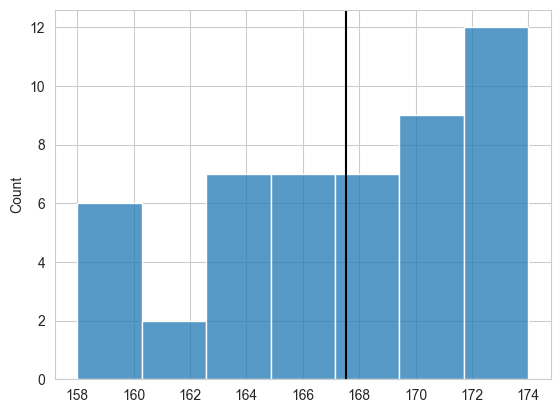

In [4]:
sns.histplot(x=data)
plt.axvline(x=sample_mean, color='black');

Our data does not follow a normal distribution.

## Calculating the sample distribution using bootstrap

Let us define `generateSamples` function to generate samples WITH REPLACEMENT using `data`.

In [5]:
def generateSamples(sample_data, num_samples=10000):
    '''
    It returns a DataFrame where each column is a sample.
    '''
    sample_size = len(sample_data)
    col = ['S'+str(k) for k in range(num_samples)]
    samp = np.random.choice(sample_data, replace=True, size=sample_size*num_samples)
    df = pd.DataFrame(samp.reshape(sample_size, num_samples), columns=col)
    return(df)    

Let us generate 10,000 samples, and save them into a DataFrame.

In [6]:
dfSamples = generateSamples(data, num_samples=10000)
print(dfSamples.shape)
dfSamples.head()

(50, 10000)


,S0,S1,S2,S3,S4,...,S9995,S9996,S9997,S9998,S9999
0,170,164,163,174,158,...,174,169,173,160,173
1,174,163,172,169,170,...,168,160,163,160,163
2,166,173,170,170,169,...,164,160,170,164,160
3,174,161,167,163,170,...,169,169,167,174,169
4,174,164,174,165,167,...,163,160,169,160,172


We are going to use the mean as our statistic test.

`sample_distribution_mean` is a list with the mean of all samples.

In [7]:
sample_distribution_mean = dfSamples.mean() 

This is the histogram of `sample_distribution_mean`:

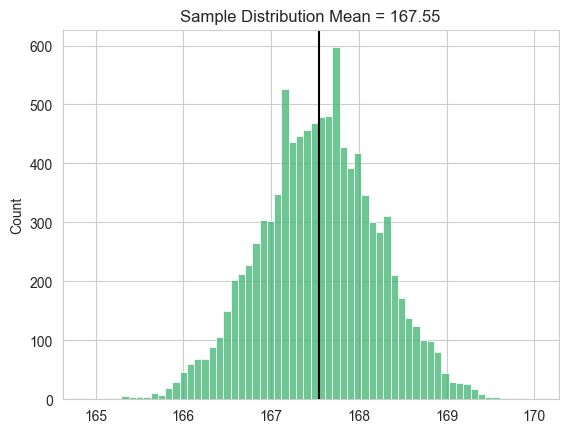

In [8]:
# Plotting a histogram of sample_distribution_mean
sns.histplot(x=sample_distribution_mean, color='mediumseagreen')
plt.axvline(x=sample_distribution_mean.mean(), color='black')
plt.title('Sample Distribution Mean = %.2f' %(np.mean(sample_distribution_mean)));

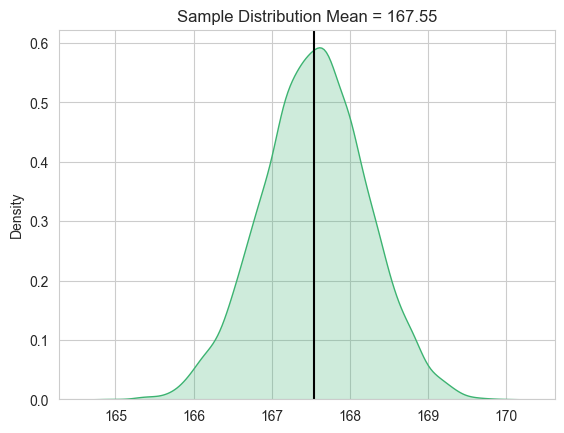

In [9]:
# kde plot of sample_distribution_mean
sns.kdeplot(x=sample_distribution_mean, color='mediumseagreen', fill=True)
plt.axvline(x=sample_distribution_mean.mean(), color='black')
plt.title('Sample Distribution Mean = %.2f' %(np.mean(sample_distribution_mean)));

## The hypothesis

Suppose we want to test the hypothesis:
- `Ho: mean   = 170`
- `Ha: mean != 170`

The first step is to construct the sample distribution under Ho; we need to build a sample distribution with a mean of `170`.

In [10]:
# sample distribution under Ho
sample_distribution_Ho = sample_distribution_mean - sample_distribution_mean.mean() + 170

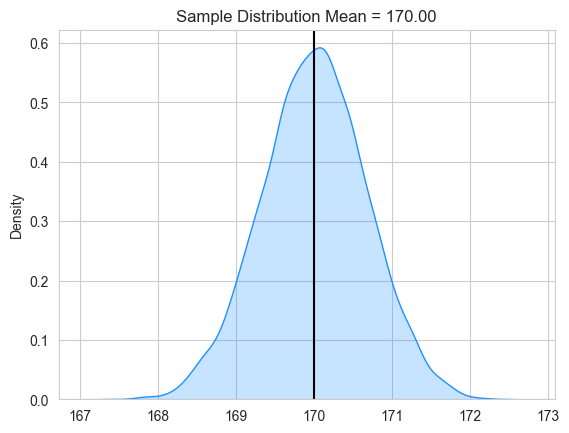

In [11]:
sns.kdeplot(x=sample_distribution_Ho, color='dodgerblue', fill=True)
plt.axvline(x=sample_distribution_Ho.mean(), color='black')
plt.title('Sample Distribution Mean = %.2f' %(np.mean(sample_distribution_Ho)));

## Critical Regions

We have three critical regions, according to the hypothesis we want to test:
- left
- right
- two-sided

To calculate the p-values, we will use two variables:
- `sample_distribution_Ho`: sample distribution under Ho
- `test_value`: hypothesized value

Let's define alpha = 0.05

In [12]:
alpha = 0.05

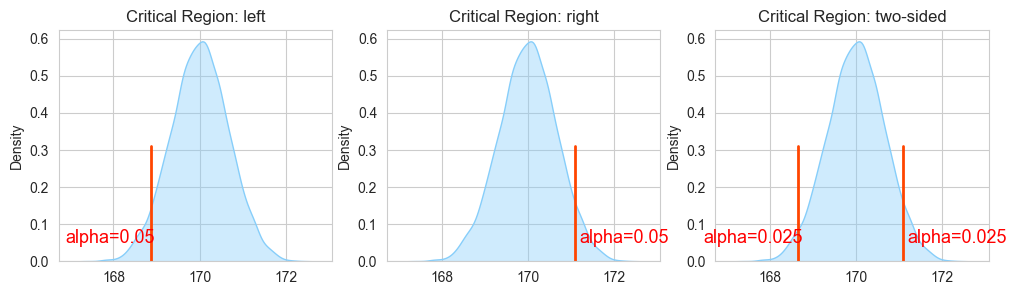

In [13]:
plt.figure(figsize=(12, 3))

plt.subplot(131)
ax = sns.kdeplot(x=sample_distribution_Ho, color='lightskyblue', fill=True, alpha=0.4)
cv1 = np.percentile(sample_distribution_Ho, alpha*100)              # left critical value   
plt.axvline(x = cv1, ymin=0, ymax=0.5, color='orangered', linewidth=2)
plt.text(cv1-2, 0.05, 'alpha=0.05', color='red', size='13')
plt.title('Critical Region: left')

plt.subplot(132)
ax = sns.kdeplot(x=sample_distribution_Ho, color='lightskyblue', fill=True, alpha=0.4)
cv2 = np.percentile(sample_distribution_Ho, 100-alpha*100)          # right critical value 
plt.axvline(x = cv2, ymin=0, ymax=0.5, color='orangered', linewidth=2)
plt.text(cv2+0.1, 0.05, 'alpha=0.05', color='red', size='13')
plt.title('Critical Region: right')

plt.subplot(133)
ax = sns.kdeplot(x=sample_distribution_Ho, color='lightskyblue', fill=True, alpha=0.4)
cv1 = np.percentile(sample_distribution_Ho, (alpha/2)*100)          # left critical value 
cv2 = np.percentile(sample_distribution_Ho, 100-alpha*100)          # right critical value      
plt.axvline(x = cv1, ymin=0, ymax=0.5, color='orangered', linewidth=2)
plt.axvline(x = cv2, ymin=0, ymax=0.5, color='orangered', linewidth=2)
plt.text(cv1-2.2, 0.05, 'alpha=0.025', color='red', size='13')
plt.text(cv2 + 0.1, 0.05, 'alpha=0.025', color='red', size='13')
plt.title('Critical Region: two-sided')

plt.show();

## Calculating the p-value

The p-value is the probability of getting a test statistic more extreme than the one we have calculated from our sample, given Ho is true.

We reject Ho if our p-value is small enough.

For calculating the p-value we will:
- Calculate the number of simulated test stats that are more extreme than our hypothesized `test_value`
- Calculate it using the empirical distribution function (ECDF)

Both options are equivalent. They get the same result.

Let us start defining the `test_value`:

In [14]:
test_value = 170

### p-value for alternative hypothesis: `smaller` (critical region: left)



- `Ho: measure = test_value`
- `Ha: measure <  test_value`

In our case, we will be testing: 

- `Ho: mean = 170`
- `Ha: mean < 170`

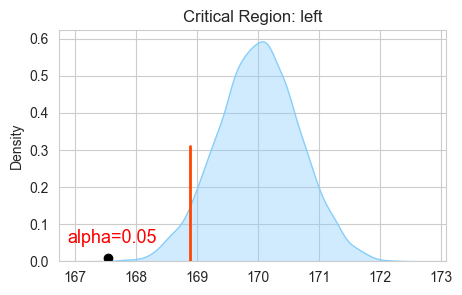

In [15]:
plt.figure(figsize=(5,3))
ax = sns.kdeplot(x=sample_distribution_Ho, color='lightskyblue', fill=True, alpha=0.4)
plt.plot(sample_mean, 0.01, 'o', color='black')
cv1 = np.percentile(sample_distribution_Ho, alpha*100)              # left critical value 
plt.axvline(x = cv1, ymin=0, ymax=0.5, color='orangered', linewidth=2)
plt.text(cv1-2, 0.05, 'alpha=0.05', color='red', size='13')
plt.title('Critical Region: left');

Let us calculate the number of simulated test stats that are less than or equal to our `sample_mean`.

p-value is the area under the curve from -infinity to the `sample_mean`

In [16]:
lowtail = np.sum(np.array(sample_distribution_Ho)<=sample_mean)
pval_s = lowtail/(len(sample_distribution_Ho))
print('Smaller alternative hypothesis: p-value = %.4f' %pval_s)

Smaller alternative hypothesis: p-value = 0.0002


Let us calculate the p-value using the empirical distribution.

In [17]:
# Creating the empirical distribution
ecdf = ECDF(sample_distribution_Ho)

In [18]:
pval_s = ecdf(sample_mean)
print('Smaller alternative hypothesis: p-value = %.4f' %pval_s)

Smaller alternative hypothesis: p-value = 0.0002


As you can see, both values are the same.

### p-value for alternative hypothesis: `larger` (critical region: right)

- `Ho: measure = test_value`
- `Ha: measure > test_value`

In our case, we will be testing: 

- `Ho: mean = 170`
- `Ha: mean > 170`

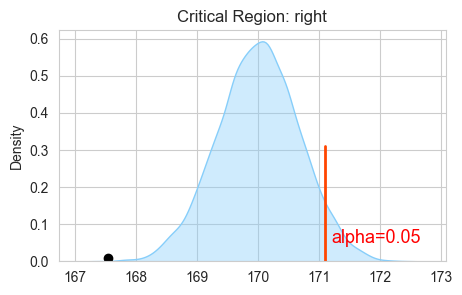

In [19]:
plt.figure(figsize=(5,3))
ax = sns.kdeplot(x=sample_distribution_Ho, color='lightskyblue', fill=True, alpha=0.4)
plt.plot(sample_mean, 0.01, 'o', color='black')
cv2 = np.percentile(sample_distribution_Ho, 100-alpha*100)      # right critical value
plt.axvline(x = cv2, ymin=0, ymax=0.5, color='orangered', linewidth=2)
plt.text(cv2+0.1, 0.05, 'alpha=0.05', color='red', size='13')
plt.title('Critical Region: right');

p-value here is 1 - the area under the curve (pfd) from the `sample_mean` to infinity because it is a right critical region.

Let us calculate the number of simulated test stats that are greater than to our original `sample_mean`.

In [20]:
upptail = np.sum(np.array(sample_distribution_Ho)>sample_mean)
pval_l = upptail/(len(sample_distribution_Ho))
print('Larger alternative hypothesis: p-value = %.4f' %pval_l)

Larger alternative hypothesis: p-value = 0.9998


Let us calculate the p-value using the empirical distribution.

In [21]:
pval_l = 1 - ecdf(sample_mean)
print('Larger alternative hypothesis: p-value = %.4f' %pval_l)

Larger alternative hypothesis: p-value = 0.9998


Both ways produce the same p-value.

Notice that we can add both p-values (smaller and larger) and get 1. That is because they are complementaries.

In [22]:
print('Smaller alternative hypothesis: p-value = %.4f' %pval_s)
print('Larger alternative hypothesis: p-value  = %.4f' %pval_l)
print('Adding both values: %.1f' %(pval_s + pval_l))

Smaller alternative hypothesis: p-value = 0.0002
Larger alternative hypothesis: p-value  = 0.9998
Adding both values: 1.0


### p-value for alternative hypothesis: `two-sided` (critical region: two-sided)

- `Ho: measure  = test_value`
- `Ha: measure != test_value`

In our case, we will be testing: 

- `Ho: mean  = 170`
- `Ha: mean != 170`

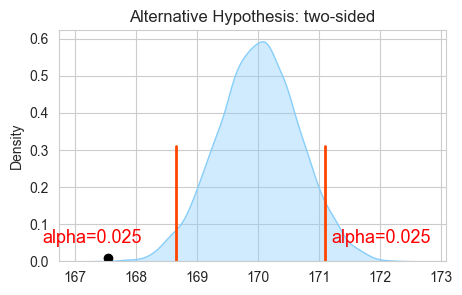

In [23]:
plt.figure(figsize=(5,3))
ax = sns.kdeplot(x=sample_distribution_Ho, color='lightskyblue', fill=True, alpha=0.4)
plt.plot(sample_mean, 0.01, 'o', color='black')
cv1 = np.percentile(sample_distribution_Ho, (alpha/2)*100)     # left critical value 
cv2 = np.percentile(sample_distribution_Ho, 100-alpha*100)     # right critical value
plt.axvline(x=cv1, ymin=0, ymax=0.5, color='orangered', linewidth=2)
plt.axvline(x=cv2, ymin=0, ymax=0.5, color='orangered', linewidth=2);
plt.text(cv1-2.2, 0.05, 'alpha=0.025', color='red', size='13')
plt.text(cv2+0.1, 0.05, 'alpha=0.025', color='red', size='13')
plt.title('Alternative Hypothesis: two-sided');

To calculate the p-value when the alternative hypothesis is two-sided, we need to determine whether the test_value is to the right or left in our graph, calculate the p-value in the usual way, and then duplicate it.

Let's calculate the minimum number of simulated test stats that are:
- less than or equal to test_vales, 
- greater than test_value

In [24]:
lowtail = np.sum(np.array(sample_distribution_Ho)<=sample_mean)
upptail = np.sum(np.array(sample_distribution_Ho) >sample_mean)
pval_t = 2*np.min([lowtail, upptail])/len(sample_distribution_Ho)
print('Two-tailed test p-value = %.4f' %pval_t)

Two-tailed test p-value = 0.0004


Using ecdf:

In [25]:
#if sample_mean < np.mean(sample_distribution_Ho): 
#    pval_t = 2*ecdf(sample_mean)
#else: pval_t = 2*(1 - ecdf(sample_mean))
p_val_t = 2 * np.min([ecdf(sample_mean), 1 - ecdf(sample_mean)])
print('Two-tailed test p-value = %.4f' %pval_t)

Two-tailed test p-value = 0.0004


We do not need to use both methods to get the p-value. We can use any of them.

Let us summarize the p-value calculation in one function.

In [26]:
def getpValue(sample_distribution, obs_value, alternative='two-sided'):    
    '''
    It returns the p-value.
    sample_distribution: the sample distribution
    obs_value:           observed value 
    alpha:               significance level
    alternative:         'two-sided', 'smaller', or 'larger'    
    '''
    ecdf = ECDF(sample_distribution) 
    if alternative=='two-sided':
        p_val = 2*min(ecdf(obs_value), 1 - ecdf(obs_value))        
    elif alternative=='smaller':
        p_val = ecdf(obs_value)
    else:
        p_val = 1-ecdf(obs_value)
    return(p_val)

In [27]:
# Getting the p-value with an alternative hypothesis: smaller
pval = getpValue(sample_distribution_Ho, sample_mean, alternative='smaller')
print('For alternative hypothesis smaller: p_value = %.4f' % pval)

For alternative hypothesis smaller: p_value = 0.0002


In [28]:
# Getting the p-value with an alternative hypothesis: larger
pval = getpValue(sample_distribution_Ho, sample_mean, alternative='larger')
print('For alternative hypothesis larger: p_value = %.4f' % pval)

For alternative hypothesis larger: p_value = 0.9998


In [29]:
# Getting the p-value with an alternative hypothesis: two-sided (default)
pval = getpValue(sample_distribution_Ho, sample_mean)
print('For alternative hypothesis two-sided: p_value = %.4f' % pval)

For alternative hypothesis two-sided: p_value = 0.0004


## One Sample Hypothesis Test with Bootstrapping

We have:
- data: a representative sample
- The hypothesis we want to test

We want to define a function for hypothesis testing.

### Defining bootstrap one_sample_HT

We will create a function for the hypothesis test. We could receive `data` as a parameter and use it to determine its mean and the sample distribution. The calculation of sample distribution is time-consuming, and we could use the same sample distribution to test several hypotheses. So, we decided to receive it as a parameter instead of calculating it in each call to the function.

In [30]:
def boot_one_sample_HT(sample_value, sample_distribution, population_value, alpha=0.05, alternative='two-sided'):
    '''
    Bootstrap method for one-sample hypothesis test.
    sampl_value:        observed value calculated from the sample
    sampl_distribution: sample distribution calculated from the sample
    pop_value:          population mean
    alpha:              significance level
    alternative:        one of the three values: 'two-sided', 'smaller', and 'larger'
    '''
    sigHa = {'two-sided':'!=', 'smaller':'< ', 'larger':'> '}
    print('--- Bootstrap One-Sample Hypothesis Test ---')
    print('    Ho: measure  =', np.round(population_value, 2))    
    print('    Ha: measure', sigHa[alternative], np.round(population_value, 2))    
    print('    Sample Mean = %.2f' %(sample_value))  
    sample_distribution_Ho = sample_distribution - np.mean(sample_distribution) + population_value
    sns.kdeplot(x=sample_distribution_Ho, color='lightskyblue', fill=True, alpha=0.4)   # plotting the sample distribution
    plt.axvline(x=sample_value, ymin=0, ymax= 0.03, color='black', linewidth=6)          # plotting the statistic 
    plt.title('Sampling Distribution')
    p_val = getpValue(sample_distribution_Ho, sample_value, alternative)
    if alternative=='two-sided':        # plotting the graph with two critical regions
        cv1 = np.round(np.percentile(sample_distribution_Ho, (alpha/2)*100),2)           # left critical value     
        cv2 = np.round(np.percentile(sample_distribution_Ho, 100-(alpha/2)*100),2)       # right critical value
        plt.axvline(x = cv1, ymin=0, ymax=0.5, color='orangered', linewidth=2)  
        plt.axvline(x = cv2, ymin=0, ymax=0.5, color='orangered', linewidth=2)
    elif alternative=='smaller':        # plotting the graph with left critical region
        cv1 = np.round(np.percentile(sample_distribution_Ho, alpha*100),2)               # left critical value 
        plt.axvline(x = cv1, ymin=0, ymax=0.5, color='orangered', linewidth=2)
    else:                               # plotting the graph with right critical region
        cv2 = np.round(np.percentile(sample_distribution_Ho, 100-alpha*100),2)           # right critical value
        plt.axvline(x = cv2, ymin=0, ymax=0.5, color='orangered', linewidth=2)
    print('    p-value = '+str(np.round(p_val,4)))

Let us use the function `boot_one_sample_HT` with `data` for the hypothesis.
- `Ho: mean = 170`
- `Ha: mean != 170`

--- Bootstrap One-Sample Hypothesis Test ---
    Ho: measure  = 170
    Ha: measure != 170
    Sample Mean = 167.54
    p-value = 0.0004


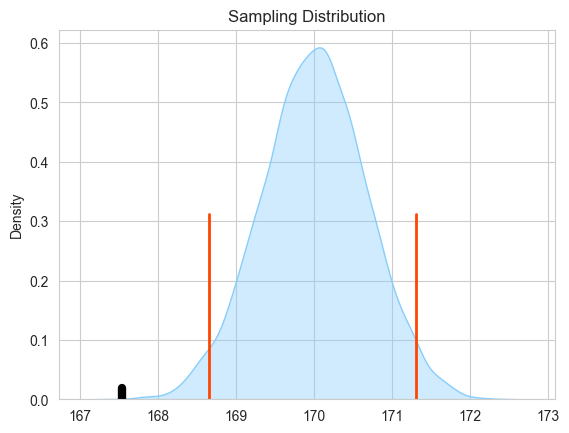

In [31]:
boot_one_sample_HT(sample_mean, sample_distribution_mean, 170)

p-value < 0.05, we reject Ho. We conclude the mean is different from 170.

Let's analyse:
- `Ho: mean = 168`
- `Ha: mean != 168`

--- Bootstrap One-Sample Hypothesis Test ---
    Ho: measure  = 168
    Ha: measure != 168
    Sample Mean = 167.54
    p-value = 0.488


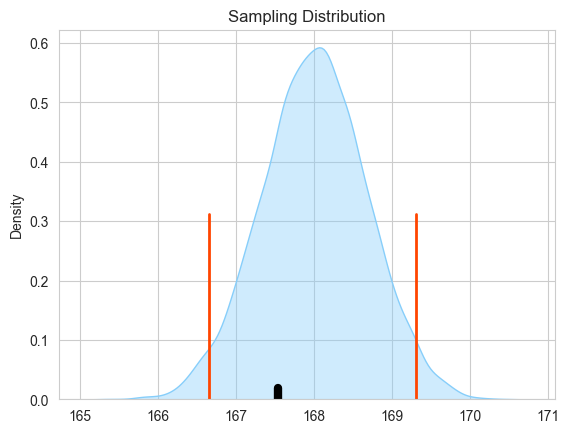

In [32]:
boot_one_sample_HT(sample_mean, sample_distribution_mean, 168)

There are no reasons for rejecting Ho, and we cannot affirm the mean is different from 168.

Let's analyse:
- `Ho: mean = 166`
- `Ha: mean > 166`

--- Bootstrap One-Sample Hypothesis Test ---
    Ho: measure  = 166
    Ha: measure >  166
    Sample Mean = 167.54
    p-value = 0.0109


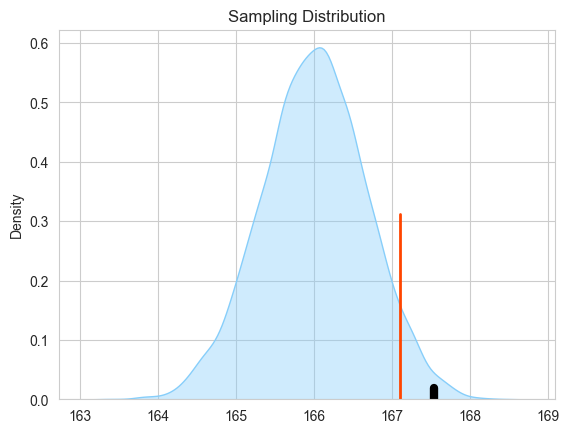

In [33]:
boot_one_sample_HT(sample_mean, sample_distribution_mean, 166, alternative='larger')

p-value < 0.05, therefore we reject Ho and conclude the mean is greater than 166.

Let's compare this result with the traditional t-test.

### Testing the variance

Let's run the bootstrap hypothesis test for the variance.

The first step is calculate the sample distribution for the variance and the variance of our sample.

In [34]:
sample_distribution_var = dfSamples.var()
sample_var = np.var(data)

--- Bootstrap One-Sample Hypothesis Test ---
    Ho: measure  = 20
    Ha: measure != 20
    Sample Mean = 22.29
    p-value = 0.4922


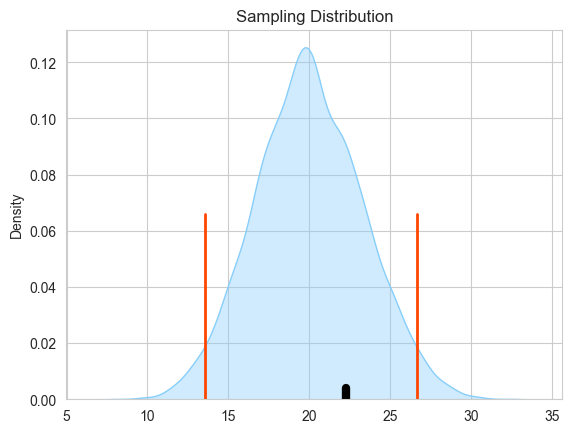

In [35]:
boot_one_sample_HT(sample_var, sample_distribution_var, 20)

There are no reasons for rejecting Ho. The sample variance is not significantly different from 20.

What about variance = 30? Let's formulate the hypothesis:
- `Ho: var = 30`
- `Ha: var < 30`

--- Bootstrap One-Sample Hypothesis Test ---
    Ho: measure  = 30
    Ha: measure <  30
    Sample Mean = 22.29
    p-value = 0.0081


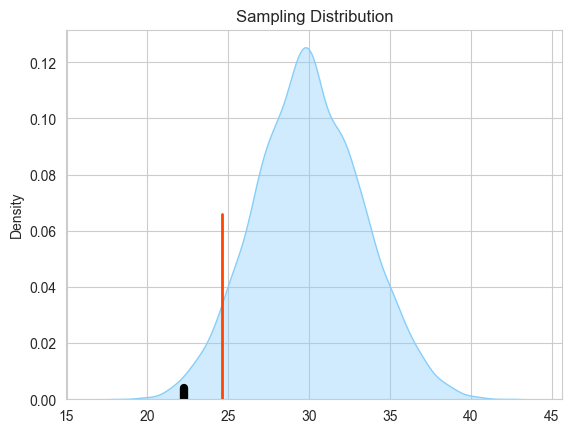

In [36]:
boot_one_sample_HT(sample_var, sample_distribution_var, 30, alternative='smaller')

And indeed 22.29 < 30

### Testing the skew

Let's use the bootstrapping method to test the hypothesis involving the skewness of data:

- `Ho: skew = 0`
- `Ha: skew < 0`

We stat calculating the sample distribution for the skewness.

In [37]:
sample_distribution_skew = dfSamples.skew()

In [38]:
from scipy.stats import skew
sample_skew = skew(data)

--- Bootstrap One-Sample Hypothesis Test ---
    Ho: measure  = 0
    Ha: measure <  0
    Sample Mean = -0.43
    p-value = 0.0295


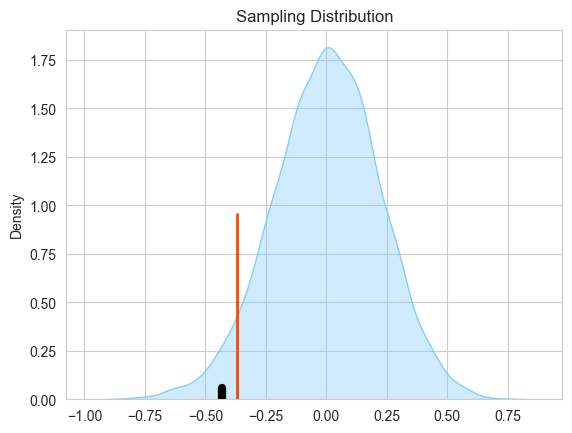

In [39]:
boot_one_sample_HT(sample_skew, sample_distribution_skew, 0, alternative='smaller')

We conclude that the skewness is significantly less than 0.

## References

- Davison, A.C., Hinkley, D.V. (1997) Bootstrap Methods and their Applications, chapter 4, Cambridge: Cambridge University Press.
- Bradley, E., Tibshirani, R.J. (1993) An Introduction to the Bootstrap. chapter 16, Boca Raton: Chapman & Hall/CRC.